joint0_angle = 240.9 degrees
joint1_angle = 110.8 degrees
End Effector at x = 16.4 y = -27.1


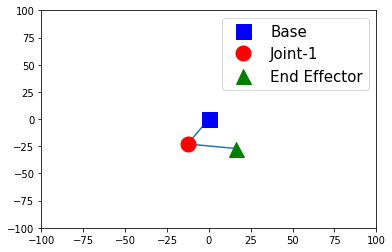

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to compute the arm configuration
def compute_arm_config(link1_length, link2_length, joint0_angle, joint1_angle):
    # TODO: compute the position of the p1 joint and the end effector at p2.        
    joint1_x = link1_length * np.cos(joint0_angle)
    joint1_y = link1_length * np.sin(joint0_angle)
    p2_x = joint1_x + link2_length * np.cos(joint0_angle + joint1_angle)
    p2_y = joint1_y + link2_length * np.sin(joint0_angle + joint1_angle)
    return joint1_x, joint1_y, p2_x, p2_y
    
# Generate random link lengths and joint angles
# Note: because these are randomly generated on each run
# Every time you run the code you'll get a different result!
link1_length = np.random.random() * 30 + 20
link2_length = np.random.random() * 30 + 20
joint0_angle = np.random.random() * 2 * np.pi
joint1_angle = np.random.random() * 2 * np.pi

joint1_x, joint1_y, p2_x, p2_y = compute_arm_config(link1_length, link2_length, joint0_angle, joint1_angle)

print("joint0_angle =", round(joint0_angle * 180 / np.pi, 1), "degrees") 
print("joint1_angle =", round(joint1_angle * 180 / np.pi, 1),"degrees") 
print("End Effector at x =", round(p2_x, 1),"y =", round(p2_y, 1))
base_x = 0
base_y = 0
# Plot the links
plt.plot([base_x, joint1_x, p2_x], [base_y, joint1_y, p2_y])
# Plot the base as a blue square
plt.plot(base_x, base_y, 'bs', markersize=15, label='Base')
# Plot Joint-1 as a red circle
plt.plot(joint1_x, joint1_y, 'ro', markersize=15, label='Joint-1')
# Plot End Effector as a green triangle
plt.plot(p2_x, p2_y, 'g^', markersize=15, label='End Effector')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.legend(fontsize=15)
plt.show()

## Sympy 测试

In [6]:
from sympy import symbols, cos, sin, pi, simplify
from sympy.matrices import Matrix
import numpy as np

### Create symbols for joint variables which are commonly represented by "q"
### Joint variable "q" is equal to "ϴ" or "d" depending if the joint is revolute or prismatic
q1, q2, q3, q4 = symbols('q1:5') # remember slices do not include the end value. slices 不包含最后一个
# unrelated symbols can be defined like this:
A, R, O, C = symbols('A R O C')

# Conversion Factors
rtd = 180./np.pi # radians to degrees
dtr = np.pi/180. # degrees to radians



R_x = Matrix([[ 1,              0,        0],
              [ 0,        cos(q1), -sin(q1)],
              [ 0,        sin(q1),  cos(q1)]])

R_y = Matrix([[ cos(q2),        0,  sin(q2)],
              [       0,        1,        0],
              [-sin(q2),        0,  cos(q2)]])

R_z = Matrix([[ cos(q3), -sin(q3),        0],
              [ sin(q3),  cos(q3),        0],
              [ 0,              0,        1]])

print("Rotation about the X-axis by 45-degrees")
print(R_x.evalf(subs={q1: 45*dtr}))
# 更改 q1 变量为 45度，看矩阵的运算结果。
# evalf：To evaluate a numerical expression into a floating point number

print("Rotation about the y-axis by 45-degrees")
print(R_y.evalf(subs={q2: 45*dtr}))

print("Rotation about the Z-axis by 30-degrees")
print(R_z.evalf(subs={q3: 30*dtr}))

Rotation about the X-axis by 45-degrees
Matrix([[1.00000000000000, 0, 0], [0, 0.707106781186548, -0.707106781186547], [0, 0.707106781186547, 0.707106781186548]])
Rotation about the y-axis by 45-degrees
Matrix([[0.707106781186548, 0, 0.707106781186547], [0, 1.00000000000000, 0], [-0.707106781186547, 0, 0.707106781186548]])
Rotation about the Z-axis by 30-degrees
Matrix([[0.866025403784439, -0.500000000000000, 0], [0.500000000000000, 0.866025403784439, 0], [0, 0, 1.00000000000000]])


### Intrinsic Rotation

In [20]:
from sympy import symbols, cos, sin, pi, sqrt
from sympy.matrices import Matrix

### Create symbols for joint variables
q1, q2 = symbols('q1:3') # slices 不包含最后一个

# Create a symbolic matrix representing an intrinsic sequence of rotations 
  # about the Y and then Z axes. Let the rotation about the Y axis be described
  # by q1 and the rotation about Z by q2. 
####### TO DO ########
# Replace R_y and R_z with the appropriate (symbolic) elementary rotation matrices 
  # and then compute YZ_intrinsic. 
R_y = Matrix([[ cos(q1),        0, sin(q1)],
              [ 0,              1,       0],
              [-sin(q1),        0, cos(q1)]])
R_z = Matrix([[ cos(q2), -sin(q2),       0],
              [ sin(q2),  cos(q2),       0],
              [       0,        0,       1]])

YZ_intrinsic_sym = R_y * R_z
YZ_intrinsic_num = YZ_intrinsic_sym.evalf(subs={q1: pi/4, q2: pi/3})

YZ_intrinsic_sym


Matrix([
[ cos(q1)*cos(q2), -sin(q2)*cos(q1), sin(q1)],
[         sin(q2),          cos(q2),       0],
[-sin(q1)*cos(q2),  sin(q1)*sin(q2), cos(q1)]])

### Extrinsic Rotation

In [21]:
from sympy import symbols, cos, sin, pi, sqrt
from sympy.matrices import Matrix

### Create symbols for joint variables
q1, q2 = symbols('q1:3')

# Create a symbolic matrix representing an extrinsic sequence of rotations 
  # about the Z and then Y axes. Let the rotation about the Y axis be described
  # by q1 and the rotation about Z by q2. 
####### TO DO ########
# Replace R_y and R_z with the appropriate (symbolic) elementary rotation matrices 
  # and then compute ZY_extrinsic. 
R_y = Matrix([[ cos(q1),        0, sin(q1)],
              [ 0,              1,       0],
              [-sin(q1),        0, cos(q1)]])
R_z = Matrix([[ cos(q2), -sin(q2),       0],
              [ sin(q2),  cos(q2),       0],
              [       0,        0,       1]])
ZY_extrinsic_sym = R_y * R_z
ZY_extrinsic_num = ZY_extrinsic_sym.evalf(subs={q1: pi/4, q2: pi/3})

ZY_extrinsic_sym


Matrix([
[ cos(q1)*cos(q2), -sin(q2)*cos(q1), sin(q1)],
[         sin(q2),          cos(q2),       0],
[-sin(q1)*cos(q2),  sin(q1)*sin(q2), cos(q1)]])

### Angule from Matrix
- 使用 atan2 函数
- atan2 allows calculating the arctangent of all four quadrants. 
- atan only allows calculating from quadrants 1 and 3. 当 x>0, y<0 和 x<0, y>0 时没有对应的结果



In [23]:
#!/usr/bin/env python
import numpy as np
from sympy.matrices import Matrix
from sympy import symbols, atan2, sqrt

# Conversion Factors
rtd = 180/np.pi
dtr = np.pi/180

# Fixed Axis X-Y-Z Rotation Matrix
R_XYZ = Matrix([[ 0.353553390593274, -0.306186217847897, 0.883883476483184],
                [ 0.353553390593274,  0.918558653543692, 0.176776695296637],
                [-0.866025403784439,               0.25, 0.433012701892219]])

### Identify useful terms from rotation matrix
r31 = R_XYZ[2,0]
r11 = R_XYZ[0,0]
r21 = R_XYZ[1,0]
r32 = R_XYZ[2,1]
r33 = R_XYZ[2,2]


### Euler Angles from Rotation Matrix
  # sympy synatx for atan2 is atan2(y, x)
beta  = atan2(-r31, sqrt(r11 * r11 + r21 * r21)) * rtd
gamma = atan2(r32, r33) * rtd
alpha = atan2(r21, r11) * rtd


print("alpha is = ",alpha*dtr, "radians", "or ", alpha, "degrees")
print("beta  is = ",beta*dtr,  "radians", "or ", beta, "degrees")
print("gamma is = ",gamma*dtr, "radians", "or ", gamma, "degrees")

alpha is =  0.785398163397448 radians or  45.0000000000000 degrees
beta  is =  1.04719755119660 radians or  60.0000000000000 degrees
gamma is =  0.523598775598299 radians or  30.0000000000000 degrees
